### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
from scipy import stats as st

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3805,The Warriors,PS2,"2,005.00",Action,0.44,0.02,0.00,0.07,84.00,8.5,M
10240,Bodycount,X360,"2,011.00",Shooter,0.07,0.03,0.00,0.01,53.00,4.7,M
1304,SoulCalibur IV,PS3,"2,008.00",Fighting,0.72,0.40,0.14,0.20,85.00,7.9,T
15342,Dakar 2: The World's Ultimate Rally,XB,"2,003.00",Racing,0.02,0.00,0.00,0.00,nan,NaN,NaN
1046,Kanshuu Nippon Joushikiryoku Kentei Kyoukai: I...,DS,"2,006.00",Misc,0.00,0.00,1.71,0.00,nan,NaN,NaN
1654,Final Fantasy IV,DS,"2,007.00",Simulation,0.51,0.04,0.62,0.05,85.00,7.7,E10+
9213,Dynasty Warriors 7: Empires,PS3,"2,012.00",Action,0.00,0.00,0.14,0.00,63.00,8,T
11172,WRC 5: FIA World Rally Championship,PS3,"2,015.00",Sports,0.02,0.05,0.00,0.01,nan,NaN,NaN
12486,Cold Fear,XB,"2,005.00",Action,0.05,0.01,0.00,0.00,71.00,7.6,M
1863,SingStar Legends,PS2,"2,006.00",Misc,0.12,0.75,0.00,0.23,76.00,tbd,T


Визуально, что необходимо изменить:

- В дальнейшем изменим названия столбцов для удобства работы
- Год релиза в некорректной форме
- Приведем все к нижнему регистру

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Есть пропуски, в дальнейшем подумаем, что с ними делать

In [5]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
df.isnull().sum().sort_values() / df.shape[0] * 100

Platform           0.00
NA_sales           0.00
EU_sales           0.00
JP_sales           0.00
Other_sales        0.00
Name               0.01
Genre              0.01
Year_of_Release    1.61
User_Score        40.09
Rating            40.48
Critic_Score      51.32
dtype: float64

In [7]:
df.duplicated().sum()

0

На данном этапе дубликатов нет

In [8]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


In [9]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [10]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [11]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [12]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [14]:
df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

### Шаг 2. Подготовьте данные

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

#### Замените названия столбцов (приведите к нижнему регистру);

In [15]:
df.columns.to_list()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [16]:
#заменим названия столбцов
columns = ['game_name',
 'platform',
 'year_of_release',
 'game_genre',
 'sales_na_mil',
 'sales_eu_mil',
 'sales_jp_mil',
 'sales_other_mil',
 'critic_score',
 'user_score',
 'rating_esrb']

df.set_axis(columns, axis='columns', inplace=True)

#знаю, что можно автоматизировать через df.columns = df.columns.str.lower, 
#но я менял названия и переставлял местами слова, решил, что так будет разумнее

In [17]:
#проверим
df.sample(5)

,game_name,platform,year_of_release,game_genre,sales_na_mil,sales_eu_mil,sales_jp_mil,sales_other_mil,critic_score,user_score,rating_esrb
3826,The Golden Compass,PS2,"2,007.00",Action,0.13,0.00,0.00,0.39,46.00,5.2,E10+
16492,Vitamin X,PS2,"2,007.00",Adventure,0.00,0.00,0.01,0.00,nan,NaN,NaN
10622,Vanishing Point,PS,"2,001.00",Racing,0.06,0.04,0.00,0.01,68.00,tbd,E
1948,Overwatch,XOne,"2,016.00",Shooter,0.63,0.33,0.00,0.10,91.00,5.6,T
14801,Sengoku Basara: Sanada Yukimura-Den,PS3,"2,016.00",Action,0.00,0.00,0.03,0.00,nan,NaN,NaN


#### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
game_name          16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
game_genre         16713 non-null object
sales_na_mil       16715 non-null float64
sales_eu_mil       16715 non-null float64
sales_jp_mil       16715 non-null float64
sales_other_mil    16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating_esrb        9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [19]:
df.sample(5)

,game_name,platform,year_of_release,game_genre,sales_na_mil,sales_eu_mil,sales_jp_mil,sales_other_mil,critic_score,user_score,rating_esrb
16395,Rainbow Islands: Revolution,PSP,"2,005.00",Action,0.01,0.00,0.00,0.00,nan,NaN,NaN
1784,Pokemon Rumble Blast,3DS,"2,011.00",Action,0.47,0.26,0.35,0.07,56.00,7.1,E10+
7302,Pandemonium!,PS,"1,996.00",Platform,0.12,0.08,0.00,0.01,nan,NaN,NaN
8671,NHL 2005,XB,"2,004.00",Sports,0.12,0.03,0.00,0.01,77.00,6.2,E
1879,Untold Legends: Brotherhood of the Blade,PSP,"2,005.00",Role-Playing,0.54,0.33,0.01,0.22,68.00,7.6,T


In [20]:
#приведем все к нижнему регистру
df['game_name'] = df['game_name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['game_genre'] = df['game_genre'].str.lower()
df['rating_esrb'] = df['rating_esrb'].str.lower()

In [21]:
#проверим
df.sample(10)

,game_name,platform,year_of_release,game_genre,sales_na_mil,sales_eu_mil,sales_jp_mil,sales_other_mil,critic_score,user_score,rating_esrb
10834,seaworld adventure parks: shamu's deep sea adv...,gc,"2,005.00",adventure,0.07,0.02,0.00,0.00,nan,NaN,NaN
16176,fab 5 soccer,ds,"2,008.00",sports,0.01,0.00,0.00,0.00,nan,tbd,e
1856,the final fantasy legend,gb,"1,989.00",role-playing,0.00,0.00,1.10,0.00,nan,NaN,NaN
2760,[prototype 2],ps3,"2,012.00",action,0.36,0.28,0.00,0.10,79.00,6.8,m
11846,spongebob's truth or square,x360,"2,009.00",action,0.03,0.04,0.00,0.00,nan,6.5,e
15550,ridge racer unbounded,pc,"2,012.00",racing,0.00,0.02,0.00,0.00,72.00,6,t
9996,karaoke revolution presents american idol enco...,ps3,"2,008.00",misc,0.11,0.00,0.00,0.01,nan,tbd,e10+
10781,who wants to be a millionaire?,x360,"2,011.00",misc,0.09,0.00,0.00,0.01,nan,NaN,NaN
10270,4 game fun pack: monopoly / boggle / yahtzee /...,ds,"2,005.00",misc,0.10,0.00,0.00,0.01,nan,NaN,NaN
6509,yakuza: ishin,ps3,"2,014.00",action,0.00,0.00,0.26,0.00,nan,NaN,NaN


In [22]:
#проверим дубликаты после приведения к нижнему регистру
df.duplicated().sum()

0

Дубликатов не появилось, отлично

In [23]:
#проверим
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
game_name          16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
game_genre         16713 non-null object
sales_na_mil       16715 non-null float64
sales_eu_mil       16715 non-null float64
sales_jp_mil       16715 non-null float64
sales_other_mil    16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating_esrb        9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Обработайте пропуски при необходимости

In [24]:
#заполним пропуски в critic_score и user_score на -1
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df['year_of_release'] = df['year_of_release'].fillna(2099)

In [25]:
#проверим
print('Пропусков в critic_score - ', df['critic_score'].isnull().sum())
print('Пропусков в user_score - ', df['user_score'].isnull().sum())
print('Пропусков в year_of_release - ', df['year_of_release'].isnull().sum())

Пропусков в critic_score -  0
Пропусков в user_score -  0
Пропусков в year_of_release -  0


In [26]:
#заменим пропуски в rating_esrb на 'no_esrb'
df['rating_esrb'] = df['rating_esrb'].fillna('no_esrb')
print(df['rating_esrb'].unique())

['e' 'no_esrb' 'm' 't' 'e10+' 'k-a' 'ao' 'ec' 'rp']


In [27]:
#проверим после всех действий количество пропусков
df.isnull().sum().sort_values() / df.shape[0] * 100

platform          0.00
year_of_release   0.00
sales_na_mil      0.00
sales_eu_mil      0.00
sales_jp_mil      0.00
sales_other_mil   0.00
critic_score      0.00
user_score        0.00
rating_esrb       0.00
game_name         0.01
game_genre        0.01
dtype: float64

In [28]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [29]:
#проверим
df['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

#### Объясните, почему заполнили пропуски определённым образом или почему не стали это делать

- Пропусков очень много в user_score 40.09% и critic_score 51.32%, заменять на какие либо значения нет смысла, т.к. это очень исказит дальнейшее исследование.
Заменили на индикаторное значение -1.


- rating_esrb - рейтинг от ESRB - может быть, в те времена не было такой организации, вот и рейтинга от неё тоже нет. Невозможно дать рейтинг игре, посчитав его как среднее рейтингов игр того же жанра. Поставим рейтинг "no_esrb"


- Столбец year_of_release (год выпуска игры) имеет 1.61% пропусков. Не много, но неприятно. Средними/медианами эти пропуски не заполнить, эти данные не являются самыми важными для анализа данных, да и пропусков в столбце не так много. Другими словами, целых данных достаточно для анализа, поэтому оставляем как есть.

Ни по одному столбцу заполнить пропуски хотя бы усредненными данными не представляется возможным. Тем не менее, заполнили их "нереальными" данными для возможности спокойно работать с этими строками по другим параметрам.

#### Опишите причины, которые могли привести к пропускам

- Пропуски в critic_score и user_score могли возникнуть из-за того, что критики и пользователи попросту не оставили свои оценки

- Как и говорил ранее, рейтинг от ESRB - может быть, в те времена не было такой организации, вот и рейтинга от неё тоже нет. 

#### Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать

Исходя из FAQ Metacritic'a, найдем, что это аббревиатура от To Be Determined. Пишется тогда, когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации.

Но числовой тип столбца нам необходим.

In [30]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
#df['user_score'] = df['user_score'].astype('float')
df['user_score'] = df['user_score'].fillna(-1)
df['user_score'] = df['user_score'].astype('float')

In [31]:
#проверим
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
game_name          16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
game_genre         16713 non-null object
sales_na_mil       16715 non-null float64
sales_eu_mil       16715 non-null float64
sales_jp_mil       16715 non-null float64
sales_other_mil    16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating_esrb        16715 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [32]:
df['sales_total'] = df['sales_na_mil'] + df['sales_eu_mil'] + df['sales_jp_mil'] + df['sales_other_mil']

In [33]:
df.head()

,game_name,platform,year_of_release,game_genre,sales_na_mil,sales_eu_mil,sales_jp_mil,sales_other_mil,critic_score,user_score,rating_esrb,sales_total
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.00,-1.00,no_esrb,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,no_esrb,31.38


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
game_name          16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
game_genre         16713 non-null object
sales_na_mil       16715 non-null float64
sales_eu_mil       16715 non-null float64
sales_jp_mil       16715 non-null float64
sales_other_mil    16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating_esrb        16715 non-null object
sales_total        16715 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


### Шаг 3. Проведите исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

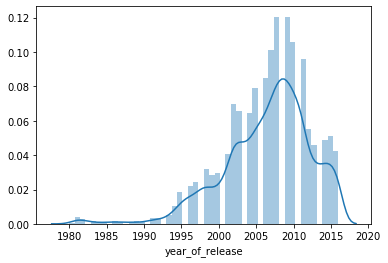

In [35]:
sns.distplot(df[df['year_of_release'] != 2099]['year_of_release'])

До 1994 года производилось мало игр, это и логично так как не было настолько много компьютеров и других платформ для игр.
В 1995 году начала
Пик приходиться с 2007 по 2012, могу предположить, что с развитием мобильных устройств упала и производительность игр.

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Text(0.5, 1.0, 'Сумма продаж, выпущенные на разных платформах. ')

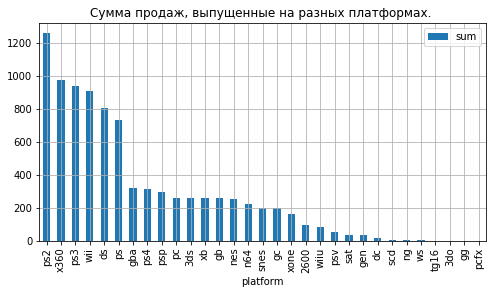

In [36]:
df.groupby('platform')['sales_total']\
    .agg(['sum'])\
    .sort_values('sum',ascending=False)\
    .plot(kind='bar', grid=True, figsize=(8, 4))
plt.title('Сумма продаж, выпущенные на разных платформах. ')

In [37]:
df.groupby('platform')['sales_total']\
    .agg(['sum'])\
    .sort_values('sum',ascending=False).head(6)

,sum
platform,
ps2,"1,255.77"
x360,971.42
ps3,939.65
wii,907.51
ds,806.12
ps,730.86


In [38]:
top_platform = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

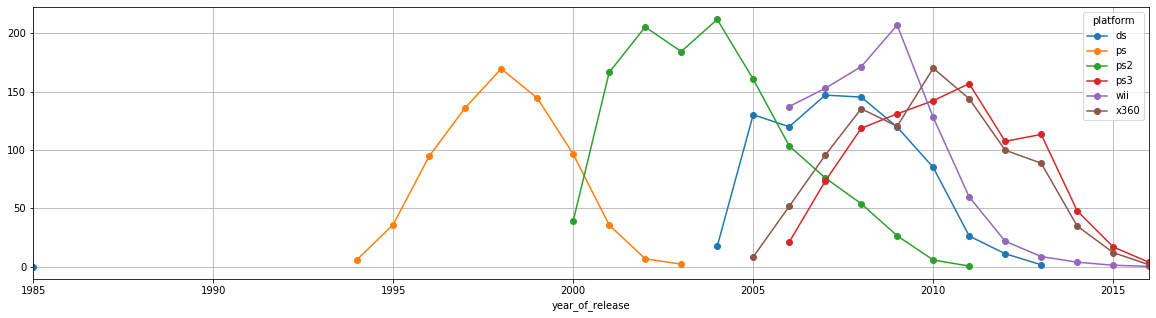

In [39]:
df.query('platform == @top_platform and year_of_release != 2099')\
    .pivot_table(index='year_of_release', columns='platform', values='sales_total', aggfunc='sum')\
    .plot(style='o-', grid=True, figsize=(20, 5))

По графику видим, что платформа появляется и исчезает в течение примерно 10 лет.
Таким образом для нашего прогноза целесообразно рассмотреть период за последние 5 лет, т.е те платформы которые набирают популярность, либо находятся на пике.

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Целесообразно рассмотреть период за последние 5 лет, т.е те платформы которые набирают популярность, либо находятся на пике.

Text(0.5, 1.0, 'Продажи по платформам, появившимся после 2012')

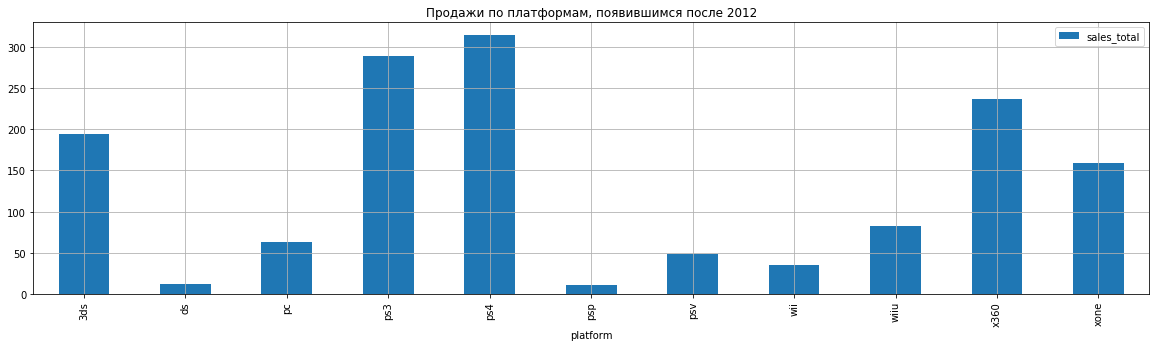

In [40]:
df.query('year_of_release >= 2012 & year_of_release != 2099')\
    .pivot_table(index='platform', values='sales_total', aggfunc='sum')\
    .plot(kind='bar', grid=True, figsize=(20, 5))
plt.title('Продажи по платформам, появившимся после 2012')

C 2011 по 2016 год пятерка лидеров продаж выглядит так:
3ds, ps3, ps4, x360, xone.

Необходимо проанализировать продажи по годам, чтобы проследить тенденцию.
У каких платформ идет рост продаж, у каких спад.

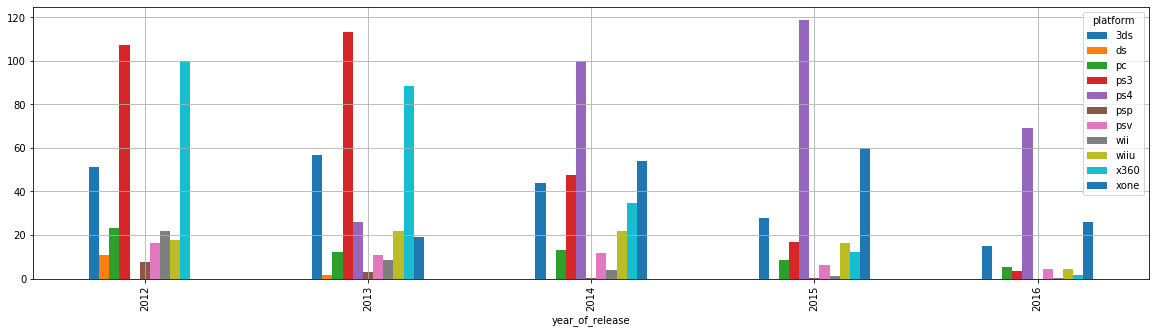

In [41]:
df.query('year_of_release >= 2012 & year_of_release != 2099')\
    .pivot_table(index='year_of_release', columns='platform', values='sales_total', aggfunc='sum')\
    .plot(kind='bar', grid=True, figsize=(20, 5))

In [42]:
top_platform_new = ['3ds', 'ps3', 'ps4', 'x360', 'xone']

In [43]:
df.query('platform == @top_platform_new & year_of_release >= 2012 & year_of_release != 2099')\
                    .pivot_table(index='year_of_release', columns='platform', values='sales_total', aggfunc='sum')

platform,3ds,ps3,ps4,x360,xone
year_of_release,,,,,
2012,51.36,107.36,nan,99.74,nan
2013,56.57,113.25,25.99,88.58,18.96
2014,43.76,47.76,100.00,34.74,54.07
2015,27.78,16.82,118.90,11.96,60.14
2016,15.14,3.60,69.25,1.52,26.15


Как мы видем по сводной таблице:
- ps3 уже идет на спад и на нее не нужно делать ставку (это и логично, т.к. она уже и не актуальна)
- x360 уже так же утратило свою актуальность, она была на пике в 2012 году и пошла на спад

Могу выделить 3 прибыльные платформы на которые сделать акцент - 3ds, ps4, xone

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

(-0.1, 1.1)

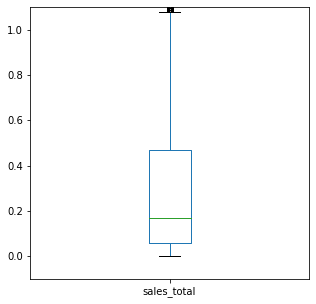

In [44]:
df['sales_total'].plot.box(figsize=(5,5))
plt.ylim(-0.1, 1.10)

In [45]:
df['sales_total'].describe()

count   16,715.00
mean         0.53
std          1.55
min          0.00
25%          0.06
50%          0.17
75%          0.47
max         82.54
Name: sales_total, dtype: float64

Продажи игр достигают до 1,1 млн долларов. Медиана - 0,17 млн $.

#### Boxplot по наиболее популярным на конец 2016 года платформам

(-0.25, 1.8)

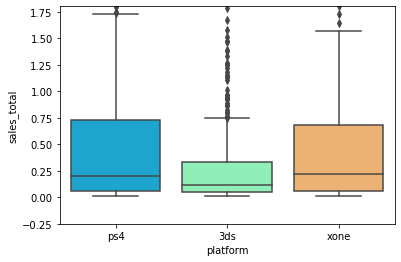

In [46]:
column_list1 = ['ps4', 'xone', '3ds']
df_1 = df.query('platform == @column_list1')
sns.boxplot(x="platform", y="sales_total", data=df_1, palette='rainbow')
plt.ylim(-0.25, 1.8)

In [47]:
df.query('platform == @column_list1')\
    .pivot_table(index='platform', values='sales_total', aggfunc=('median', 'mean', 'sum'))

,mean,median,sum
platform,,,
3ds,0.50,0.12,259.00
ps4,0.80,0.20,314.14
xone,0.65,0.22,159.32


- PS4 - продажи достигают до 1,75 млн долларов. Межквартальный размах больше, чем у платформ 3DS и XOne. Так же видим, что у платформы PS4 датасет сильнее скошен вправо. Через этот канал приходят те, кто тратит на игры, больше медианного значения. Поэтому среднее значение у данной платформы самое большое - 0,8 млн доллоров, медиана 0,2 млн доллоров.

- XOne - продажи достигают до 1,58 млн долларов. Межквартальный размах меньше, чем у платформы PS4. Датасет скошен вправо, но меньше, чем у платформы PS4. Среднее значение у данной платформы ниже, чем у PS4 - 0,65 млн доллоров, а медиана больше - 0,22 млн доллоров.

- на третьем месте платформа 3DS. Продажи достигают до 0,75 млн доллоров. Среднее значение - 0,50 млн долларов, медиана 0,12 млн долларов.

Результаты по платформам PS4 и XOne превышают показатели по глобальным продажам каждой игры . Результаты по платформе 3DS ниже, чем показатели по глобальным продажам каждой игры.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

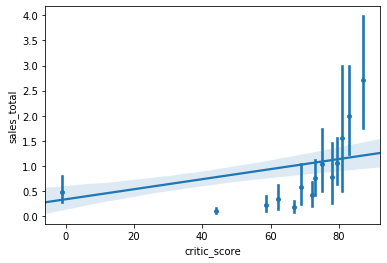

In [48]:
df_ps4 = df.query('platform == "ps4"')
sns.regplot(x='critic_score', y='sales_total',data=df_ps4, x_bins=20, scatter_kws={'s':15})

In [49]:
df_ps4['critic_score'].corr(df_ps4['sales_total'])

0.22652606614612347

На графике мы видим зависимость: с ростом первой величины (отзыв критиков) 
растет вторая величина (продажи). Т.е., чем выше отзывы критиков, тем больше продажи.

Коэффициент Пирсона равен 0,23. Чем ближе коэффициент Пирсона к значению 1, тем
сильнее взамосвязь.

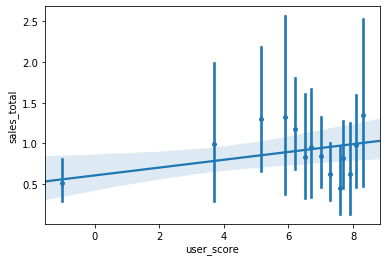

In [50]:
df_ps4 = df.query('platform == "ps4"')
sns.regplot(x='user_score', y='sales_total',data=df_ps4, x_bins=20, scatter_kws={'s':15})

In [51]:
df_ps4['user_score'].corr(df_ps4['sales_total'])

0.1159614931286009

На графике мы видим зависимость: с ростом первой величины (отзыв пользователей)
растет вторая величина (продажи). Т.е., чем выше отзывы пользователей, тем больше продажи.

Коэффициент Пирсона равен 0,11. Чем ближе коэффициент Пирсона к значению 1, 
тем сильнее взамосвязь.

Оценка пользователей оказывает меньше влияния на продажи, чем оценка критиков.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Text(0.5, 1.0, 'Количество продаж по жанрам')

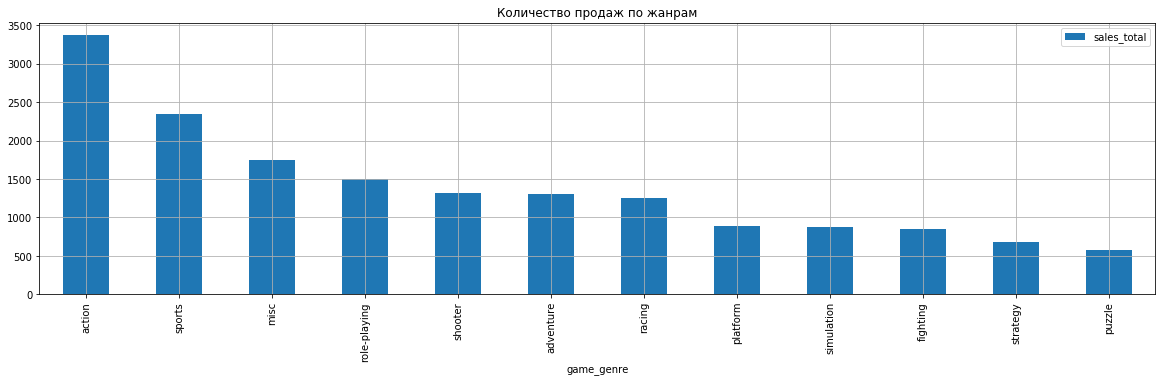

In [52]:
df.pivot_table(index='game_genre', values='sales_total', aggfunc='count')\
    .sort_values(by='sales_total', ascending=False)\
    .plot(kind='bar', grid=True, figsize=(20, 5))
plt.title('Количество продаж по жанрам')

Больше всего выпускается игр жанра Action.
Число игр с этим жанром сильно превышает остальные.

На втором месте по количеству игр жанры:
Role-Playing, Adventure, Sports, Misc и Shooter.

На третьем месте по количеству игр жанры:
Racing, Fighting, Simulation, Platform, Strategy, Puzzle 

Text(0.5, 1.0, 'Сумма продаж по жанрам')

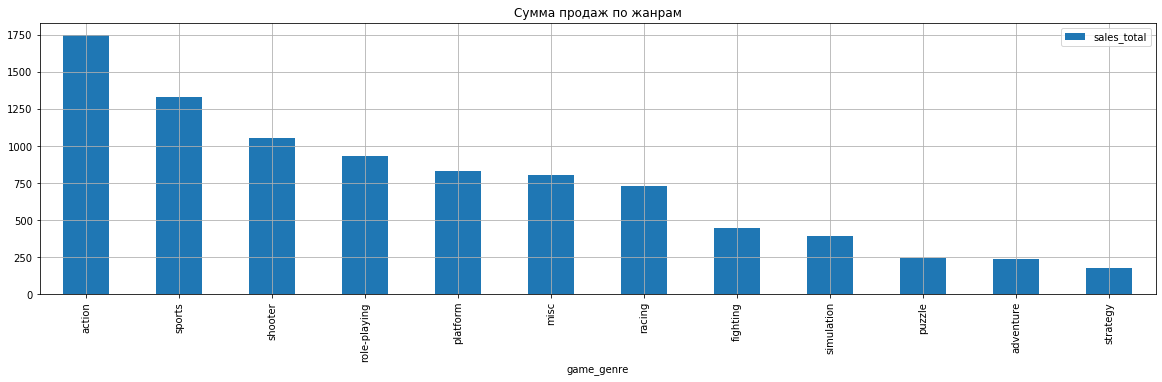

In [53]:
df.pivot_table(index='game_genre', values='sales_total', aggfunc='sum')\
    .sort_values(by='sales_total', ascending=False)\
    .plot(kind='bar', grid=True, figsize=(20, 5))
plt.title('Сумма продаж по жанрам')

Жанры с высокими продажами:
Action, Shooter, Role-Playing, Sports.

Жанры с  низкими продажами:
Misc, Platform, Racing, Fighting, Simulation, Adventure, Strategy, Puzzle 

Таким образом, в жанре Action выпускается больше всего игр и они приносят больше
всего дохода.

### Шаг 4. Составьте портрет пользователя каждого региона

#### Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Text(0.5, 1.0, 'Japan Sales')

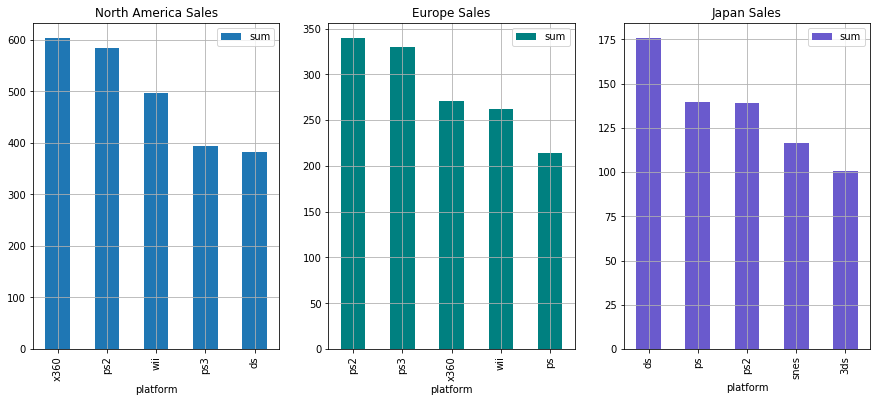

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))
df.groupby('platform')['sales_na_mil']\
    .agg(['sum']).sort_values('sum',ascending=False).head().plot(kind='bar', grid=True, ax=axes[0], )
df.groupby('platform')['sales_eu_mil']\
    .agg(['sum']).sort_values('sum',ascending=False).head().plot(kind='bar', grid=True, ax=axes[1], color='teal')
df.groupby('platform')['sales_jp_mil']\
    .agg(['sum']).sort_values('sum',ascending=False).head().plot(kind='bar', grid=True, ax=axes[2], color='slateblue')

axes[0].set_title('North America Sales')
axes[1].set_title('Europe Sales')
axes[2].set_title('Japan Sales')

В С.Америке на первом месте платформа - Х360 

В Европе на первом месте платформа - PS2 

В Японии один явный лидер - платформа DS

#### Самые популярные жанры (топ-5). Поясните разницу.

Text(0.5, 1.0, 'Japan Sales')

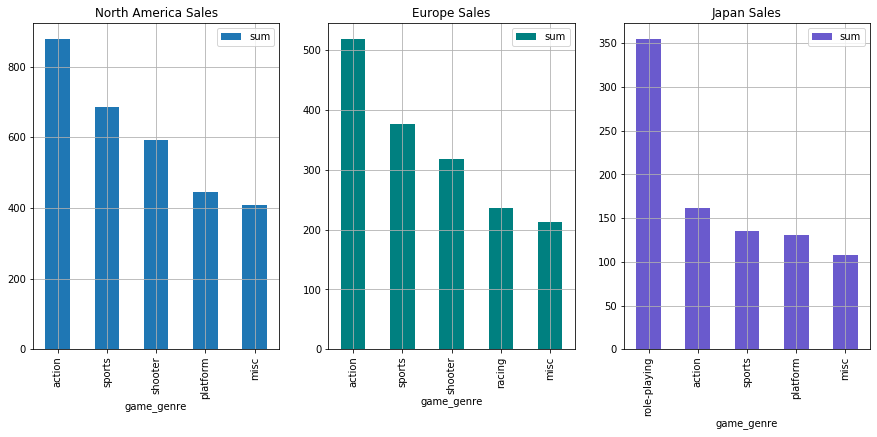

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))
df.groupby('game_genre')['sales_na_mil']\
    .agg(['sum']).sort_values('sum',ascending=False).head().plot(kind='bar', grid=True, ax=axes[0], )
df.groupby('game_genre')['sales_eu_mil']\
    .agg(['sum']).sort_values('sum',ascending=False).head().plot(kind='bar', grid=True, ax=axes[1], color='teal')
df.groupby('game_genre')['sales_jp_mil']\
    .agg(['sum']).sort_values('sum',ascending=False).head().plot(kind='bar', grid=True, ax=axes[2], color='slateblue')

axes[0].set_title('North America Sales')
axes[1].set_title('Europe Sales')
axes[2].set_title('Japan Sales')

Четыре самые первые популярные жанры в С.Америке полностью совпали с популярнами жанрами в Европе.
Отличие только в 4 месте: в С.Америке это - Platform, в Европе  - это Misc.

Совсем по другому выглядят предпочтения в Японии жанра на 1 месте.
На первом месте - Role-Playing, в остальном, жанры которые предпочитают в С.Америке и Европе совпадают.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Расшифровка рейтинга ESRB

- «E» (Everyone) — Для всех
- «E10+» («Everyone 10 and older») — Для всех старше 10 лет
- «T» (Teen) — Подросткам 13—19 лет
- «M» (Mature) — От 17 лет
- «K-A» (Kids to Adults)— Для детей и взрослых, т.е. это аналог «E»
- «AO» (Adults Only 18+) — Только для взрослых
- «EC» (early childhood) – игра предназначена специально для детей младшего возраста (от 3 лет),
- «RP» (Rating Pending)- Рейтинг ожидается

Объединим категории «E» и «K-A»

In [56]:
df['rating_esrb'].value_counts()

no_esrb    6766
e          3990
t          2961
m          1563
e10+       1420
ec            8
rp            3
k-a           3
ao            1
Name: rating_esrb, dtype: int64

In [57]:
df['rating_esrb'].replace('k-a', 'e').value_counts()

no_esrb    6766
e          3993
t          2961
m          1563
e10+       1420
ec            8
rp            3
ao            1
Name: rating_esrb, dtype: int64

Text(0.5, 1.0, 'Japan Sales')

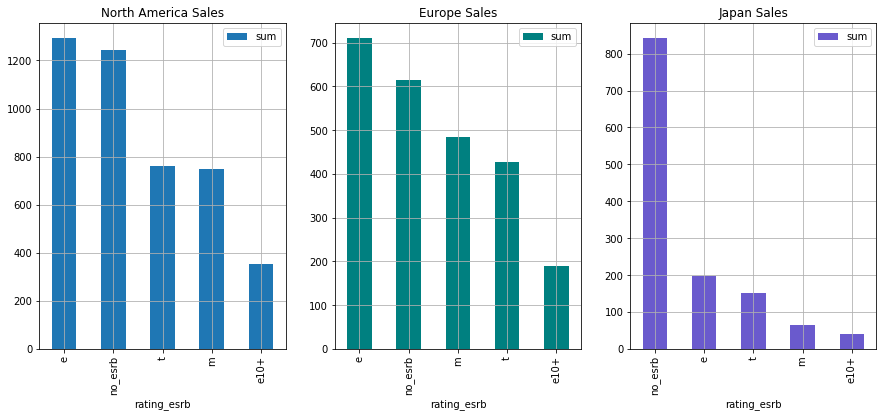

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))
df.groupby('rating_esrb')['sales_na_mil']\
    .agg(['sum']).sort_values('sum',ascending=False).head().plot(kind='bar', grid=True, ax=axes[0], )
df.groupby('rating_esrb')['sales_eu_mil']\
    .agg(['sum']).sort_values('sum',ascending=False).head().plot(kind='bar', grid=True, ax=axes[1], color='teal')
df.groupby('rating_esrb')['sales_jp_mil']\
    .agg(['sum']).sort_values('sum',ascending=False).head().plot(kind='bar', grid=True, ax=axes[2], color='slateblue')

axes[0].set_title('North America Sales')
axes[1].set_title('Europe Sales')
axes[2].set_title('Japan Sales')

Графики с рейтингами С.Америки и Европы очень похожи. Совпали первые две позиции.
В обоих регионам отдают предпочтения играм с категорией «У» (Mature) — От 17 лет.
На втором месте игры с категорией «E» - т.е. для всех.
На второе место попали игры, у которых рейтинг не определен.

На четвертом и пятом месте игры  "Для всех старше 10 лет" и "От 17 лет".
И в том и другом графике разница между двумя этими категориями не значительная.

В Японии самые популярные игры, у которых рейтинг не определен.
Это могло произойти из-за того, что ESRB — негосударственная организация, основное
направление деятельности которой — принятие и определение рейтингов для компьютерных
видеоигр и другого развлекательного программного обеспечения в США и Канаде.
Это организация может быть не знакома с продуктами из Японии. 

### Шаг 5. Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:

- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

**H0 (Нулевая гипотеза):** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**H0 (Альтернативная гипотеза):** Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

Пороговое значение alpha = 0.05

In [59]:
df_xone = df[(df['platform'] == 'xone')]
df_pc = df[(df['platform'] == 'pc')]

Подскажи, пожалуйста, почему я не смог выделить срез методом:

df.query('platform == xone')

In [60]:
print(df_xone['sales_total'].describe())
print(df_pc['sales_total'].describe())

count   247.00
mean      0.65
std       1.04
min       0.01
25%       0.06
50%       0.22
75%       0.69
max       7.39
Name: sales_total, dtype: float64
count   974.00
mean      0.27
std       0.68
min       0.01
25%       0.02
50%       0.05
75%       0.17
max       8.01
Name: sales_total, dtype: float64


In [61]:
alpha = 0.05
results = st.ttest_ind(df_xone['sales_total'], df_pc['sales_total'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print ('отвергаем гипотезу')
else:
    print ('не получилось отвергнуть гипотезу')

p-значение: 1.0196533966248761e-07
отвергаем гипотезу


Гипотеза не подтвердилась, у нас есть основания ее отвергнуть.
Таким образом, cредний пользовательский рейтинг платформы Xbox One отличается от cреднего
пользовательского рейтинга платформы PC.

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

**H0 (Нулевая гипотеза):** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;

**H0 (Альтернативная гипотеза):** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не разные.

In [62]:
df_action = df[(df['game_genre'] == 'action')]
df_sports = df[(df['game_genre'] == 'sports')]

In [63]:
alpha = 0.05
results = st.ttest_ind(df_action['user_score'], df_sports['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print ('отвергаем гипотезу')
else:
    print ('не получилось отвергнуть гипотезу')

p-значение: 1.1705362926146342e-08
отвергаем гипотезу


Отвергаем нулевую гипотезу.
Средние пользовательские рейтинги жанров Action и Sports одинаковые.

### Шаг 6. Напишите общий вывод

С 2010 года начинается спад по количеству выпускаемых игр в год и по общим продажам. Это может быть связано с тем, что мобильные игры вытесняют консольные и компьютерные. Половина всей прибыли в игровой индустрии приходиться как раз-таки на игры для мобильных устройств. Согласно аналитическим данным Newzoo, отрыв мобильных игр от консольных, браузерных и компьютерных будет только увеличиваться с каждым годом.

В среднем платформы исчезают через 10-12 лет после выпуска. Платформы, на которые нужно сделать акцент в следующем году:

- PS4 - продажи за последние 5 лет - 314.14 млн.
- XOne - продажи за последние 5 лет - 159.32 млн.
- 3DS - продажи за последние 5 лет - 259.00 млн.

Оценка критиков оказывает больше влияния на продажи, чем оценка пользователей.

- Жанры с высокими продажами: Action, Shooter, Role-Playing, Sports.
- Больше всего выпускается игр жанра Action. Число игр с этим жанром сильно превышает остальные.

Если смотреть портрет пользователя по регионам, то предпочтения в С.Америке очень близки к предпочтеним в Европе. Есть отличия по предпочтениям в Японии.

Топ-3 жанров в С.Америке и Европе одинаковый: Action, Shooter, Sports.

В Японии на первом месте - Role-Playing, остальные жанры в одном диапазоне.

Разными оказались в регионах предпочтения по платформам:

- В С.Америке на первом месте платформа - Х360 
- В Европе на первом месте платформа - PS3 
- В Японии один явный лидер - платформа 3DS, которая в С.Америке и Европе занимает 4 и 5 место соответственно.

Топ-3 категорий игр по рейтингу ESRB в С.Америке и Европе одинаковый: первое место - «Е» (от 17 лет), второе место - «no_rating», на тертьем месте игры разнаятся, у С.Америки "t" у Европы "m".

В Японии самые популярные игры, у которых рейтинг не определен. Это могло произойти из-за того, что ESRB — негосударственная организация, определяющая рейтинги для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Это организация может быть не знакома с продуктами из Японии.